In [1]:
# importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [14]:
from google.colab import drive
drive.mount("/content/gdrive")
# Reading the input
data = pd.read_csv('/content/gdrive/MyDrive/Sample-data/pubg.csv')
data.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [3]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [15]:
data.dropna(inplace=True)
print(data.shape)

(4446965, 29)


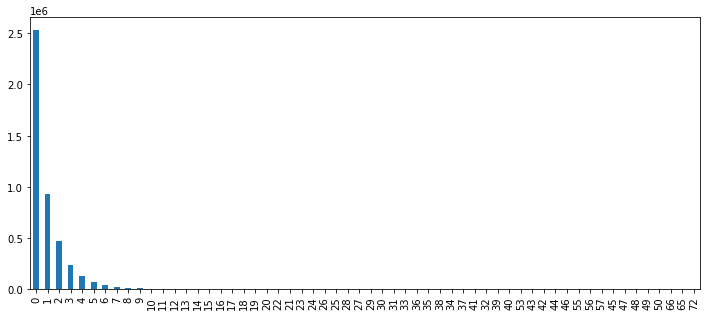

In [10]:
#Now let's look at the number of kills.

z = data.kills.value_counts()
z
plt.figure(figsize=(12,5))
z.plot.bar()
plt.show()


- most of the players didn't kill anybody 

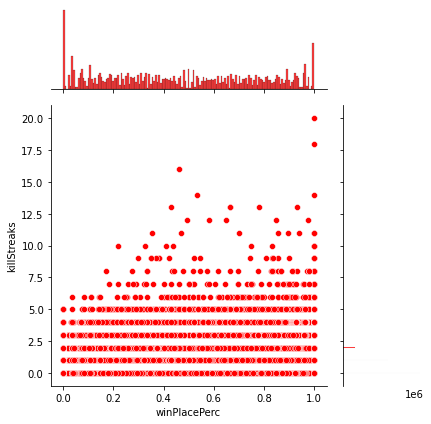

In [16]:
#Let us plot the relation between win percentage and killStreaks.
sb.jointplot(x='winPlacePerc', y='killStreaks', data=data, ratio=3, color='r')
plt.show()

In [17]:
  data.corrwith(data.winPlacePerc)

assists            0.299441
boosts             0.634234
damageDealt        0.440507
DBNOs              0.279970
headshotKills      0.277722
heals              0.427857
killPlace         -0.719069
killPoints         0.012908
kills              0.419916
killStreaks        0.377566
longestKill        0.410154
matchDuration     -0.005171
maxPlace           0.037377
numGroups          0.039621
rankPoints         0.013523
revives            0.240881
rideDistance       0.342915
roadKills          0.034544
swimDistance       0.149607
teamKills          0.015943
vehicleDestroys    0.073436
walkDistance       0.810888
weaponsAcquired    0.583806
winPoints          0.007061
winPlacePerc       1.000000
dtype: float64

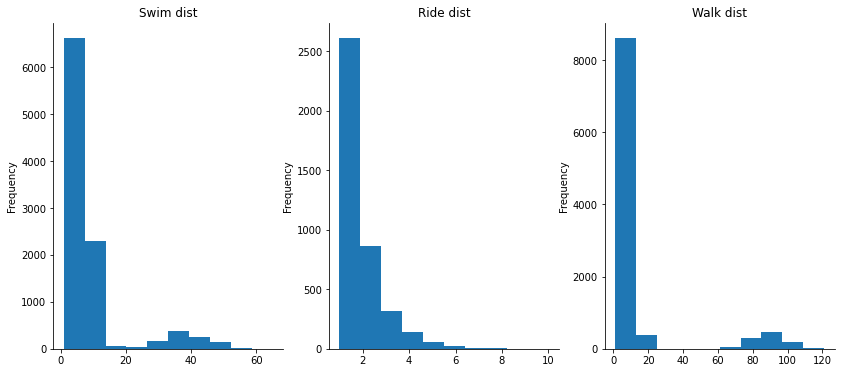

In [19]:
#We can see no specific pattern but there are still some values that show higher win place percentage.
# so checking the Skewness of the data

figure1, axplt = plt.subplots(1, 3, figsize=(14, 6))
data['swimDistance'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[0])
data['rideDistance'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[1])
data['walkDistance'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[2])
axplt[0].set_title('Swim dist')
axplt[1].set_title('Ride dist')
axplt[2].set_title('Walk dist')
plt.subplots_adjust(hspace=.3)
sb.despine()

these data are left skewed..

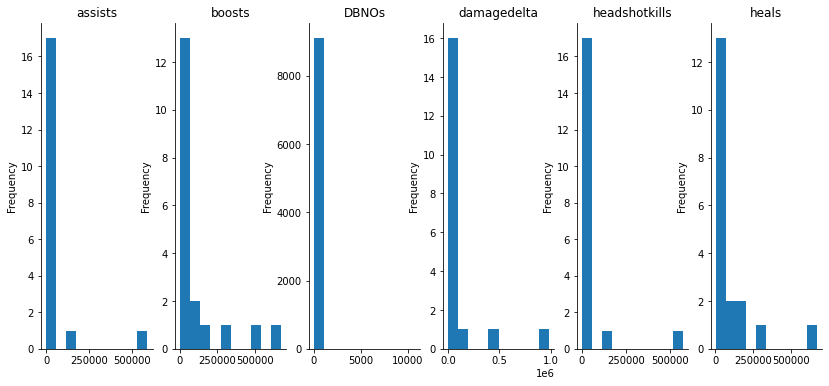

In [25]:
figure1, axplt = plt.subplots(1, 6, figsize=(14, 6))
data['assists'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[0])
data['boosts'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[1])
data['damageDealt'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[2])
data['DBNOs'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[3])
data['headshotKills'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[4])
data['heals'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[5])
axplt[0].set_title('assists')
axplt[1].set_title('boosts')
axplt[2].set_title('DBNOs')
axplt[3].set_title('damagedelta')
axplt[4].set_title('headshotkills')
axplt[5].set_title('heals')
plt.subplots_adjust(hspace=.3)
sb.despine()

These data's are left skewed

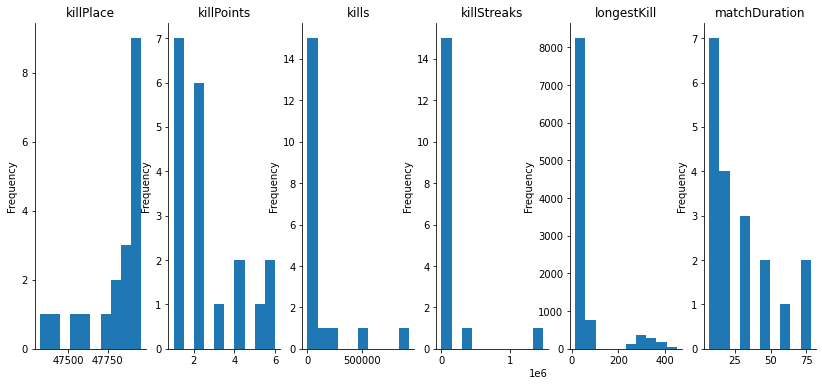

In [26]:
figure1, axplt = plt.subplots(1, 6, figsize=(14, 6))
data['killPlace'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[0])
data['killPoints'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[1])
data['kills'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[2])
data['killStreaks'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[3])
data['longestKill'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[4])
data['matchDuration'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[5])
axplt[0].set_title('killPlace')
axplt[1].set_title('killPoints')
axplt[2].set_title('kills')
axplt[3].set_title('killStreaks')
axplt[4].set_title('longestKill')
axplt[5].set_title('matchDuration')
plt.subplots_adjust(hspace=.3)
sb.despine()

KillPlace is right skewed, remaining all above are left skewed

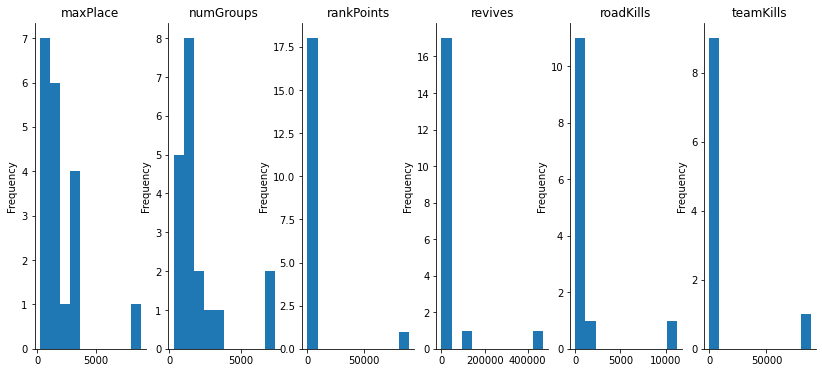

In [27]:
figure1, axplt = plt.subplots(1, 6, figsize=(14, 6))
data['maxPlace'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[0])
data['numGroups'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[1])
data['rankPoints'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[2])
data['revives'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[3])
data['roadKills'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[4])
data['teamKills'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[5])
axplt[0].set_title('maxPlace')
axplt[1].set_title('numGroups')
axplt[2].set_title('rankPoints')
axplt[3].set_title('revives')
axplt[4].set_title('roadKills')
axplt[5].set_title('teamKills')
plt.subplots_adjust(hspace=.3)
sb.despine()

all data's are left skewed

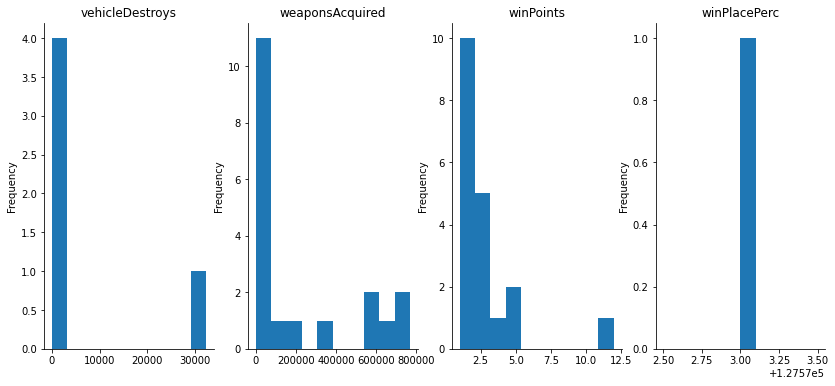

In [28]:
figure1, axplt = plt.subplots(1, 4, figsize=(14, 6))
data['vehicleDestroys'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[0])
data['weaponsAcquired'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[1])
data['winPoints'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[2])
data['winPlacePerc'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[3])
axplt[0].set_title('vehicleDestroys')
axplt[1].set_title('weaponsAcquired')
axplt[2].set_title('winPoints')
axplt[3].set_title('winPlacePerc')
plt.subplots_adjust(hspace=.3)
sb.despine()

all are left skewed except killplace which is right skewed and out target winplace perc with no skewness

In [4]:
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [16]:
# dropping ID column as not required
data.drop(columns=['Id'],axis=1,inplace=True)

In [19]:
data

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [17]:
#dropping groupid
data.drop(columns=['groupId'],axis=1,inplace=True)
data

,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [18]:
#dropping matchid
data.drop(columns=['matchId'],axis=1,inplace=True)
data

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [19]:
# Encoding the match type feature
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
data.matchType = enc.fit_transform(data.matchType)
data.matchType.unique()

array([15,  2, 13, 14,  3, 12, 11,  0,  5,  9,  4,  7,  6, 10,  1,  8])

Linear Regression

In [20]:
# Importing necessary package for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [21]:
# splitting up of data
X = data.iloc[ : , :-1]
y = data.iloc[ : ,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02)

In [25]:
model = LinearRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.8319002710519112
0.09205207434794871
0.015921906187363492


XG Boost

In [11]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))


[13:02:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:02:24] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
0.8971035641091457
0.06960353995083529
0.009728590073916204


Artifical Neural Network ( ANN )

In [26]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.8707665958134345
0.08052757184317923
0.012218681845515406


In [22]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100,50,30))
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.9149219986466948
0.06488258263400115
0.008037797853170494


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)
# Data Modeling
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape = [25], activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'linear')  
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
model.summary()
model.fit(X_train, y_train, epochs=10)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                832       
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_11 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 32)               

In [13]:
# Data Validation

train_predict = model.predict(X_train)
train_msq = mean_squared_error(y_train, train_predict)
train_r2 = r2_score(y_train, train_predict)
print("Train:\nMean Squared Error :", train_msq, "\nR2 score :", train_r2)

test_predict = model.predict(X_test) 
test_msq = mean_squared_error(y_test, test_predict) 
test_r2 = r2_score(y_test, test_predict) 
print("\nTest:\nMean Squared Error :", test_msq, "\nR2 score :", test_r2)

Train:
Mean Squared Error : 0.007241850007282302 
R2 score : 0.9233716683381908

Test:
Mean Squared Error : 0.007173784058779849 
R2 score : 0.9237541503181517
